<h1> <strong> A - Importation des modules

In [198]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp

<h1> <strong> B - Dérivée numérique

<h3> Permet l'évaluation des dérivées sur des données numériques c'est à dire sous forme discrète : Exemple d'une fonction Cosinus sous forme discrète

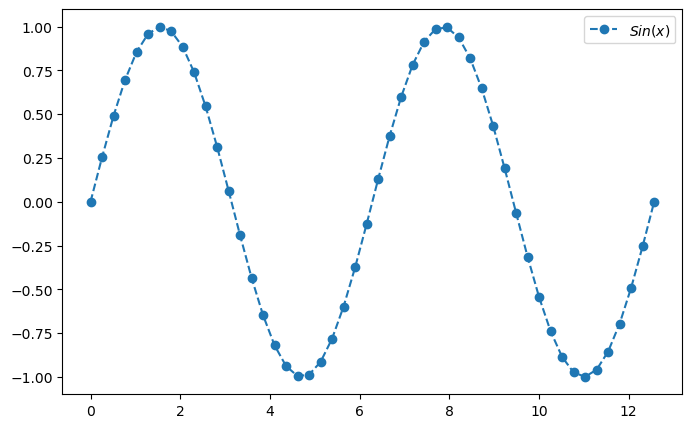

In [2]:
x0 = np.linspace( 0 ,  4*np.pi , 50)
y = np.sin(x0)

plt.figure(figsize=(8,5))

plt.plot(x0,y ,"o--" , label ="$Sin(x)$")

plt.legend()
plt.show()

<h3> Calcul de la dérivée des données dans la variables $y$ par rapport aux données dans la variable $x$

In [3]:
dy_over_dx = np.gradient( y , x0 )

<h3> Représentation graphique

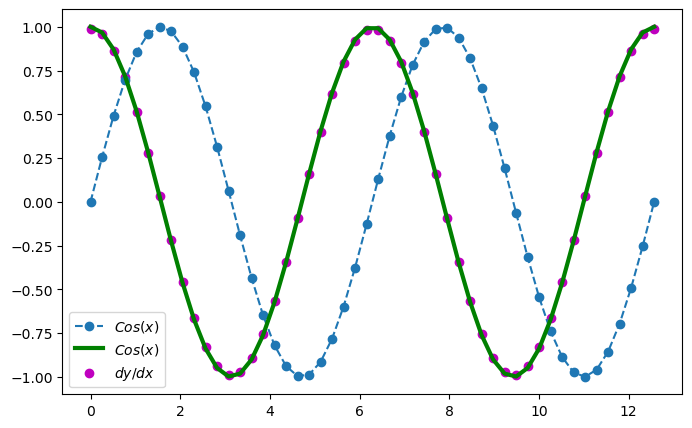

In [4]:
plt.figure(figsize=(8,5))

plt.plot( x0 , y , "o--" , label ="$Cos(x)$" )
plt.plot( x0 , np.cos(x0) , color= "g", lw = 3, label ="$Cos(x)$" )
plt.scatter( x0 , dy_over_dx  , color= "m" , label ="$dy/dx$" )

plt.legend()
plt.show()

<h1> <strong> Cas d'une fonction contenant du bruit

<h3> Imaginons que la fonction dont nous désirons évaluer la dérivée contiène du bruit

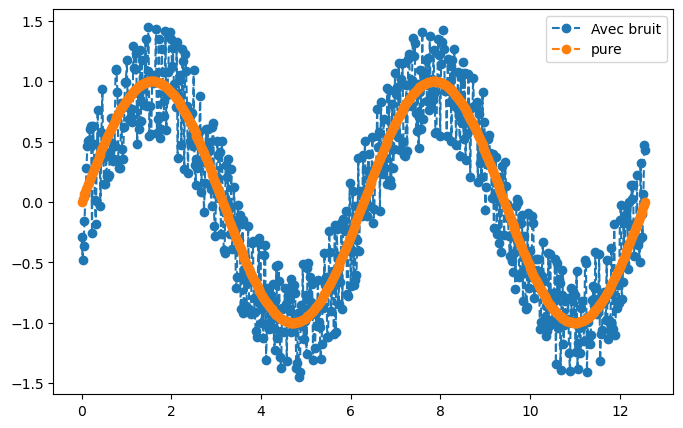

In [5]:
x = np.linspace( 0 ,  4*np.pi , 600)
y = np.sin(x)
dy_over_dx = np.gradient(y , x)
y_bruit = y + (np.random.rand(len(y)) -0.5)*1

plt.figure(figsize=(8,5))

plt.plot(x, y_bruit , "o--" , label = "Avec bruit")
plt.plot(x , y , "o--", label = "pure")

plt.legend()
plt.show()

<h3> Évaluons sa dérivée et comparons avec la dérivée du signal pure

In [6]:
deriv_y_bruit = np.gradient(y_bruit , x)

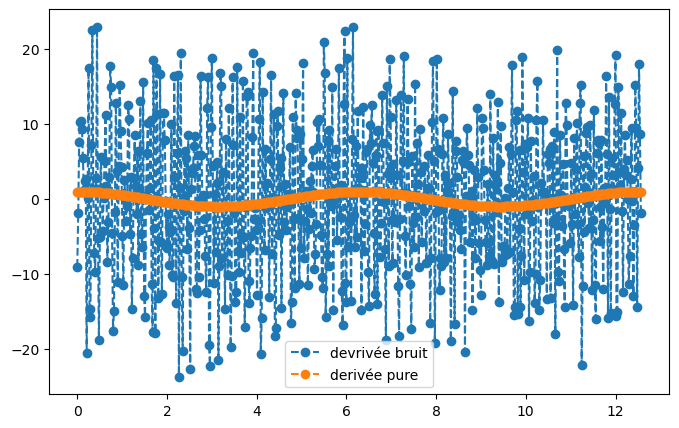

In [7]:
plt.figure(figsize = (8,5))

plt.plot(x , deriv_y_bruit , "o--" , label ="devrivée bruit")
plt.plot(x , dy_over_dx , "o--" , label = "derivée pure")

plt.legend()
plt.show()

<h3> <p> On peu observer que la dérivée du signal bruité contient encore plus de bruit par rapport à la fonction originale. Comme si le bruit avait été amplifié; ce qui est effectivement le cas car la forme de la dérivée d'une fonction dépends de la variation des valeurs des points voisins et plus il y a du bruit plus le bruit sera amplifié dans la dérivée car le bruit introduit un aléatoire dans le résultat des variations de valeurs. </p>
    <p> La façon la plus approptiée pour résoudre se problème est de lisser la courbe en utilisant une quelconque méthode afin de réduire les effets du bruit avant de passer à la dérivée

<h1> <strong> Lissage par convolution

<h3>  Filtre moyen qui permet d'attribuer en un point donné la moyenne des valeurs prises autour de ce point dans une fenêtre de n Points

In [8]:
def filtre ( n) :
    return np.ones(n)/n

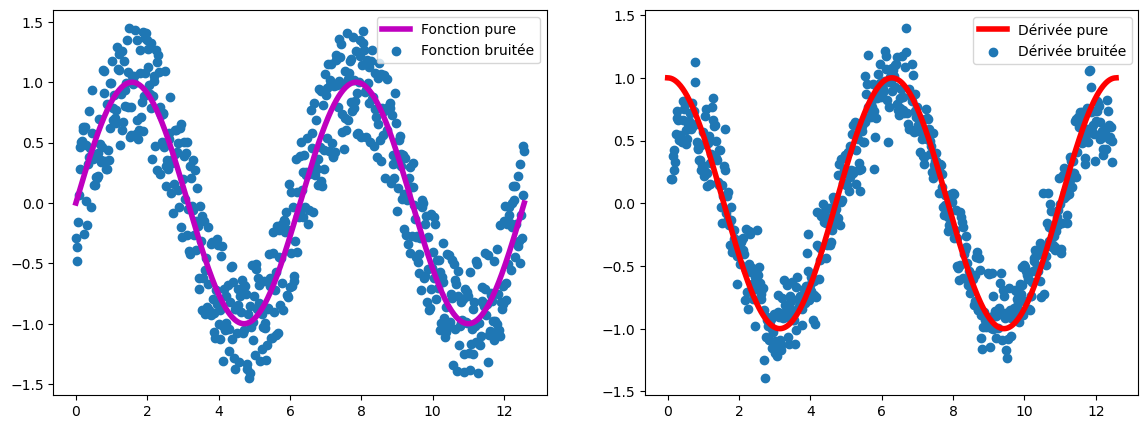

In [9]:
y_lisse = np.convolve( y_bruit , filtre(70) , mode = 'same')
delta = abs(y_bruit.size-y_lisse.size)

i = 5
y_lisse = y_lisse[i:-i]
x_lisse = x[i:-i]
dy_lisse = np.gradient( y_lisse , x_lisse)

plt.figure( figsize = (14,5) )

plt.subplot(1,2,1)
plt.plot(x , y, lw =4 , color ="m", label = "Fonction pure")
plt.scatter(x , y_bruit , label = "Fonction bruitée")
plt.legend()

plt.subplot(1,2,2)

plt.plot(x , dy_over_dx, lw = 4, color ="r", label = "Dérivée pure")
plt.scatter(x_lisse , dy_lisse, label = "Dérivée bruitée")

plt.legend()
plt.show()

<h1> <strong> C - Dérivée Symbolique

<h3> Permet l'évaluation des dérivées analytique des fonctions. Necessaire lorsqu'on possède la forme analytique de la fonction et/ou qu'on ne voudrait pas developper la dériver à la main. Exemple de la fonction : $$ f(x) = A \cos ( 2 \pi \nu x) $$ 

<h2> <strong> <li> Définition des variables et paramètres de la fonction

In [44]:
A , freq , x = smp.symbols("A f x" , real =True)

<h2> <strong> <li> Définition de la fonction

In [45]:
f = A*smp.cos( 2*smp.pi*freq*x  )

<h2> <strong> <li> Forme de la fonction

In [46]:
f

A*cos(2*pi*f*x)

<h2> <strong> <li> Calcul de la dérivée première   :  $\frac {df}{dx} $

In [47]:
df1_over_dx = smp.diff( f , x )
df1_over_dx

-2*pi*A*f*sin(2*pi*f*x)

<h2> <strong> <li> Calcul de la dérivée seconde    :  $\frac {d^2 f}{dx^2} $

In [48]:
df2_over_dx = smp.diff( f , x , 2)
df2_over_dx

-4*pi**2*A*f**2*cos(2*pi*f*x)

<h2> <strong> <li> Calcul de la dérivée troisième     :  $\frac {d^3 f}{dx^3} $

In [49]:
df3_over_dx = smp.diff( df2_over_dx , x )
df3_over_dx

8*pi**3*A*f**3*sin(2*pi*f*x)

<h2> <strong> <li> Calcul de la dérivée d'ordre 10      :  $\frac {d^{10} f}{dx^{10}} $

In [50]:
df3_over_dx = smp.diff( f , x , 10 )
df3_over_dx

-1024*pi**10*A*f**10*cos(2*pi*f*x)

<h2> <strong> <li> Évaluation de la dérivée pour une valeur spécifique de ses paramètres  :  $$\frac {d^{2} f}{dx^{2}}  \hspace{5mm} pour  \hspace{5mm} x= 0.453   \hspace{5mm} ,   \hspace{5mm} A = 0.6   \hspace{5mm}  et   \hspace{5mm}  f = 2$$

<h3> Substitution

In [51]:
df2_over_dx.subs([(x , 0.453) ])

-4*pi**2*A*f**2*cos(0.906*pi*f)

In [52]:
df2_over_dx.subs([(x , 0.453) ,(A , 0.6) ])

-2.4*pi**2*f**2*cos(0.906*pi*f)

In [53]:
df2_over_dx.subs([(x , 0.453) ,(A , 0.6) ,(freq , 2)])

-9.6*pi**2*cos(1.812*pi)

<h3> Évaluation de la valeur numérique exacte

In [54]:
df2_over_dx.subs([(x , 0.453) ,(A , 0.6) ,(freq , 2)]).evalf()

-78.6974682454058

<h2> <strong> <li> Conversion en une fonction numérique

In [57]:
fonction = smp.lambdify( ( x , A , freq ) , f)
deriv_fonction = smp.lambdify( (x , A , freq ) , df1_over_dx )

<h2> <strong> <li> Représentation graphique

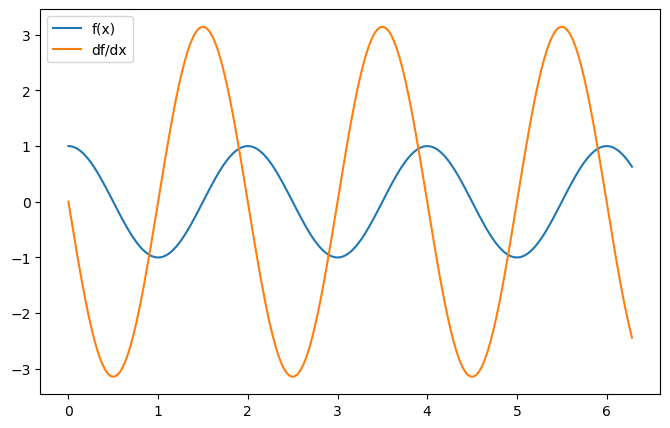

In [59]:
x0 = np.linspace(0, 2*np.pi , 200)

plt.figure(figsize= (8,5))

plt.plot(x0 , fonction(x0 , 1 , 0.5) , label="f(x)")
plt.plot(x0 , deriv_fonction(x0 , 1 , 0.5) , label="df/dx")

plt.legend()
plt.show()

<h1> <strong> D - Dérivée Quasi-Symbolique

<h3> <p>Type de dérivée applicable dans le cas où l'on ne dispose pas d'une expression analytique exacte de la fonction mais pour laquelle on a une definition ensembliste de la fonction. Par exemple : </p>
    $$ f(\beta) = \text{Var} \left\{  \left| \hspace{3mm} \frac{(\frac{\beta}{2.36})^{2.3}}{\beta^2 + x_i^2} - y_i  \hspace{3mm}\right|  \right\}      $$  
    <p> Où $x_i$ et $y_i$ sont un ensemble de données discrètes obtenues expérimentalement et La fonction $f(\beta)$ ici définie va mésurer l'écart standard entre les données $y_i$ et une transformation à la Lorentzienne des données $x_i$ paramétrés par une valeur $\beta$.
    <p> Cette variance change avec la valeur du paramètre $\beta$ et peut donc être considérer comme une fonction de $\beta$; notons cependant qu'il n'est pas possible d'obtenir une expression analytique exacte de cette fonction   </p>

In [309]:
x = np.linspace(-10 , 10 , 300)

def lorentz ( beta = 1.) :
    return (beta/2.36)**2.3/(beta**2 + x**2)

def y_discrete() :
    return 1./( 2.36**2 + x**2) + np.sin((np.random.rand(len(x)) - 0.5))*.01

y = y_discrete()

In [310]:
def fonction ( beta ) :
    return np.var( lorentz(beta) -  y_discrete() )

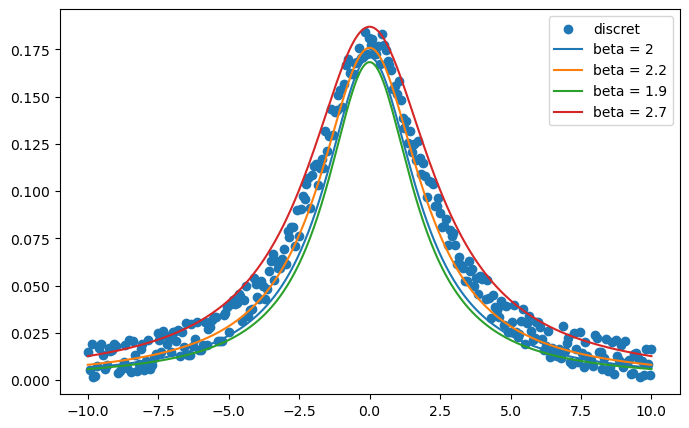

In [311]:
plt.figure( figsize=(8,5) )

plt.scatter(x , y , label= "discret")
plt.plot(x , lorentz( 2) , label="beta = 2")
plt.plot(x , lorentz( 2.2)   , label="beta = 2.2")
plt.plot(x , lorentz( 1.9)  , label="beta = 1.9")
plt.plot(x , lorentz( 2.7)   , label="beta = 2.7")

plt.legend()
plt.show()

<h2> Il n'est pas possible d'obtenir une forme analytique exacte à $f(\beta)$ mais néanmoins il est possible d'en faire une représentation graphique

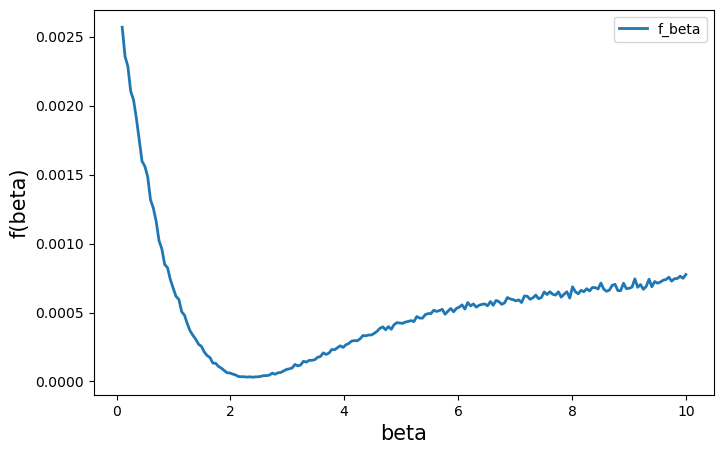

In [312]:
beta = np.linspace(0.1, 10 , 200)
f_beta = np.vectorize(fonction)( beta )

plt.figure(figsize=(8,5))

plt.plot( beta , f_beta,   lw = 2, label= "f_beta")

plt.xlabel("beta", size= 15)
plt.ylabel("f(beta)", size= 15)

plt.legend()
plt.show()

<h2> <strong> <li> Calcul de la dérivée

In [317]:
deriv = np.vectorize( sp.misc.derivative )( fonction , beta , dx = .9e-1 )

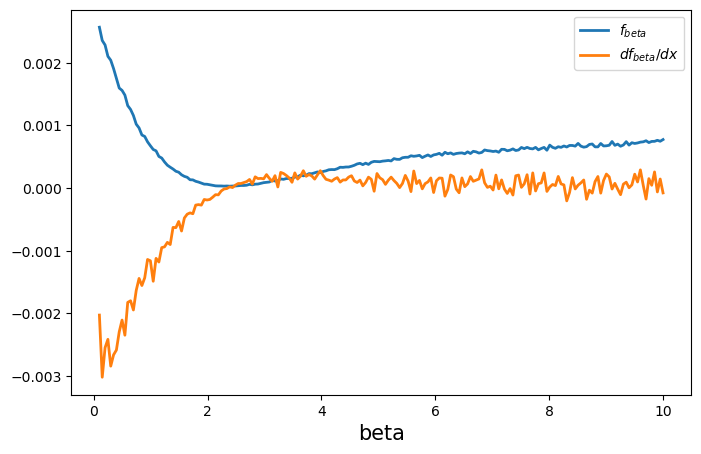

In [318]:
plt.figure(figsize=(8,5))

plt.plot( beta , f_beta,   lw = 2, label= "$f_{beta}$")
plt.plot( beta , deriv,   lw = 2, label= "$df_{beta}/dx$")

plt.xlabel("beta", size= 15)

plt.legend()
plt.show()